本notebook参考https://www.kaggle.com/poonaml/deep-neural-network-keras-way

In [1]:
#Import all required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

#from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

Using TensorFlow backend.


In [2]:
data = pd.read_csv(r"E:\kaggle\digit recognizer\train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(42000, 785)

In [5]:
data.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
pixel6      int64
pixel7      int64
pixel8      int64
pixel9      int64
pixel10     int64
pixel11     int64
pixel12     int64
pixel13     int64
pixel14     int64
pixel15     int64
pixel16     int64
pixel17     int64
pixel18     int64
pixel19     int64
pixel20     int64
pixel21     int64
pixel22     int64
pixel23     int64
pixel24     int64
pixel25     int64
pixel26     int64
pixel27     int64
pixel28     int64
            ...  
pixel754    int64
pixel755    int64
pixel756    int64
pixel757    int64
pixel758    int64
pixel759    int64
pixel760    int64
pixel761    int64
pixel762    int64
pixel763    int64
pixel764    int64
pixel765    int64
pixel766    int64
pixel767    int64
pixel768    int64
pixel769    int64
pixel770    int64
pixel771    int64
pixel772    int64
pixel773    int64
pixel774    int64
pixel775    int64
pixel776    int64
pixel777    int64
pixel778  

In [6]:
X_data = data.iloc[:,1:].values.astype('float32')
y_data = data.iloc[:,0].values

print(X_data.shape)
print(y_data.shape)

(42000, 784)
(42000,)


In [7]:
X_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

.values应该是将原本数据框的数据取出来，转换成array格式
<br>
如果是数据框格式，下面不能使用reshape函数

为什么要将X_train转换成浮点型？
因为后可视化的时候，plt.imshow需要的是浮点型数组(不转换成float似乎也能画出来)

### Data Visualization

In [8]:
X_data = X_data.reshape(X_data.shape[0], 28, 28)

把每一行数据转换成28*28的格式

In [9]:
X_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

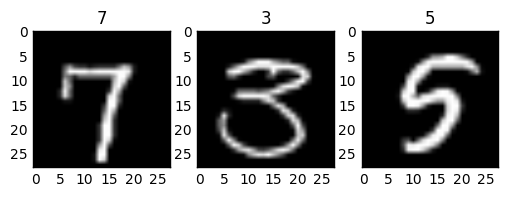

In [10]:
for i in range(6, 9):
    # 在一行上画3个图
    #plt.subplot(330 + (i+1))  # 法一
    plt.subplot(1, 3, i-5)     # 法二 (行数, 列数, 编号(其中编号从1开始))
    plt.imshow(X_data[i], cmap=plt.get_cmap('gray')) #法一   imshow画的是heatmap热力图,  cmap=plt.get_cmap('gray')为灰度图
    #plt.imshow(X_train[i], cmap=plt.cm.gray)  # 法二
    plt.title(y_data[i])

#### expand 1 more dimention as 1 for colour channel gray

In [11]:
X_data = X_data.reshape(X_data.shape[0], 28, 28,1)
X_data.shape

(42000, 28, 28, 1)

In [12]:
X_data

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

## Preprocessing the digit images

### Feature Standardization

In [13]:
mean_x = X_data.mean()
std_x = X_data.std()

In [14]:
def standardize(x):
    return (x-mean_x)/std_x

### One Hot encoding of labels

A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. In this case, the nth digit will be represented as a vector which is 1 in the nth dimension.

For example, 3 would be [0,0,0,1,0,0,0,0,0,0].

In [15]:
from keras.utils.np_utils import to_categorical
y_data = to_categorical(y_data)
num_classes = y_data.shape[1]
num_classes

10

In [16]:
y_data.shape

(42000, 10)

Lets plot 10th label.

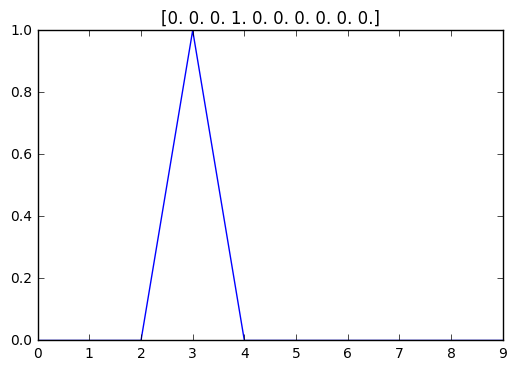

In [17]:
plt.plot(y_data[9])
plt.title(y_data[9])
#plt.xticks(range(10))
plt.show()

its 3

## Designing Neural Network Architecture

In [18]:
# fix random seed for reproducibility
seed = 43
np.random.seed(seed)

### Model 1
### Linear Model

In [19]:
from keras.models import Sequential
from keras.layers.core import  Lambda, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

Lets create a simple model from Keras Sequential layer.

+ Lambda layer performs simple arithmetic operations like sum, average, exponentiation etc.
    <br>
    In 1st layer of the model we have to define input dimensions of our data in (rows,columns,colour channel) format. (In theano colour channel comes first)


+ Flatten will transform input into 1D array.


+ Dense is fully connected layer that means all neurons in previous layers will be connected to all neurons in fully connected layer. In the last layer we have to specify output dimensions/classes of the model. Here it's 10, since we have to output 10 different digit labels.


In [20]:
model= Sequential()

# add Lambda layer
model.add(Lambda(standardize,input_shape=(28,28,1)))

# add Flatten layer
model.add(Flatten())

# add Dense layer
model.add(Dense(units = 10, activation = 'softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


### Compile network

Before making network ready for training we have to make sure to add below things:

+ A loss function: to measure how good the network is

+ An optimizer: to update network as it sees more data and reduce loss value

+ Metrics: to monitor performance of network


In [21]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

### Cross Validation

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.10, random_state=42)

batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

In [24]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/3
37800/37800 [==============================] - 181s 5ms/step - loss: 0.2401 - acc: 0.9342 - val_loss: 0.3307 - val_acc: 0.9110
Epoch 2/3
37800/37800 [==============================] - 182s 5ms/step - loss: 0.2158 - acc: 0.9417 - val_loss: 0.3473 - val_acc: 0.9126
Epoch 3/3
37800/37800 [==============================] - 184s 5ms/step - loss: 0.2098 - acc: 0.9437 - val_loss: 0.3754 - val_acc: 0.9081


In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

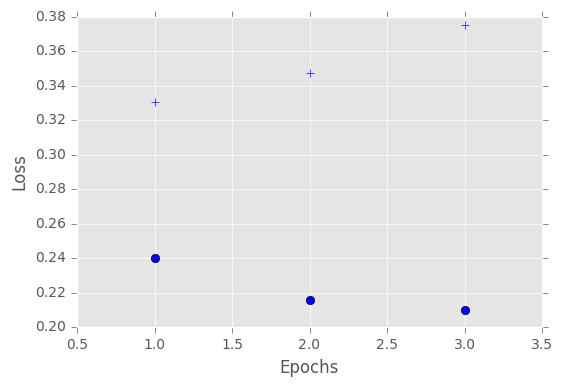

In [50]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

import matplotlib
matplotlib.rcParams['xtick.direction'] = 'out'  # 设了以后，所有图都会应用
matplotlib.rcParams['ytick.direction'] = 'out'  # 设了以后，所有图都会应用

#plt.style.use('ggplot') 设了以后，所有图都会应用

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.xlim(0.5,3.5)


plt.show()

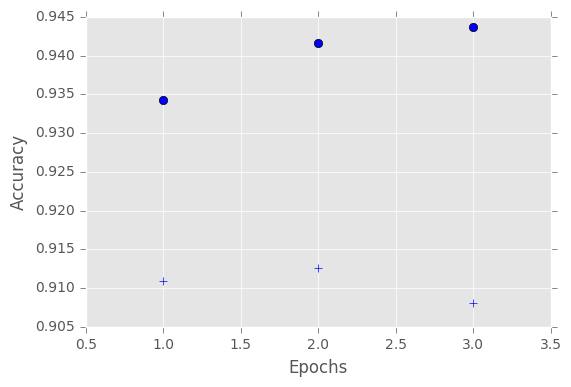

In [53]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.xlim(0.5,3.5)

plt.show()

## Model 2
## Fully Connected Model

 Neurons in a fully connected layer have full connections to all activations in the previous layer, as seen in regular Neural Networks. Adding another Dense Layer to model.

In [24]:
def get_fc_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(optimizer='Adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [25]:
fc = get_fc_model()
fc.optimizer.lr=0.01

In [56]:
history=fc.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/1
37800/37800 [==============================] - 641s 17ms/step - loss: 0.1556 - acc: 0.9721 - val_loss: 0.5358 - val_acc: 0.9536


## Model 3
## Convolutional Neural Network

CNNs are extremely efficient for images.

In [26]:
from keras.layers import Convolution2D, MaxPooling2D

def get_cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        Convolution2D(64,(3,3), activation='relu'),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [27]:
model= get_cnn_model()
model.optimizer.lr=0.01

In [62]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/1
37800/37800 [==============================] - 15573s 412ms/step - loss: 0.0725 - acc: 0.9800 - val_loss: 0.1137 - val_acc: 0.9783


# 模型的优化

## Data Augmentation

It is tehnique of showing slighly different or new images to neural network to avoid overfitting. And to achieve better generalization. In case you have very small dataset, you can use different kinds of data augmentation techniques to increase your data size. Neural networks perform better if you provide them more data.

Different data aumentation techniques are as follows:

1. Cropping
2. Rotating
3. Scaling
4. Translating
5. Flipping
6. Adding Gaussian noise to input images etc.


In [28]:
# data augmentation
gen =ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches = gen.flow(X_val, y_val, batch_size=64)

In [29]:
# CNN model
model.optimizer.lr=0.001
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/1
37800/37800 [==============================] - 10281s 272ms/step - loss: 0.0186 - acc: 0.9942 - val_loss: 0.0417 - val_acc: 0.9908


## Model 4
## Adding Batch Normalization

BN helps to fine tune hyperparameters more better and train really deep neural networks

In [29]:
from keras.layers.normalization import BatchNormalization

def get_bn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = get_bn_model()
model.optimizer.lr = 0.01
history = model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/1
37800/37800 [==============================] - 86862s 2s/step - loss: 0.0353 - acc: 0.9900 - val_loss: 0.0482 - val_acc: 0.9913


## Submitting Predictions to Kaggle.

Make sure you use full train dataset here to train model and predict on test set.

In [34]:
model.optimizer.lr=0.01
gen = image.ImageDataGenerator()
batches = gen.flow(X_data, y_data, batch_size=64)
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3)

Epoch 1/3
42000/42000 [==============================] - 8195s 195ms/step - loss: 6.0912e-04 - acc: 0.9998
Epoch 2/3
42000/42000 [==============================] - 123742s 3s/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 3/3
42000/42000 [==============================] - 10775s 257ms/step - loss: 1.1921e-07 - acc: 1.0000


In [35]:
test_data = pd.read_csv(r"E:\kaggle\digit recognizer\test.csv")
test_data.shape

(28000, 784)

In [36]:
test = test_data.values.astype('float32')
test = test.reshape(test_data.shape[0], 28, 28,1)

In [37]:
test.shape

(28000, 28, 28, 1)

In [38]:
predictions = model.predict_classes(test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("DR.csv", index=False, header=True)